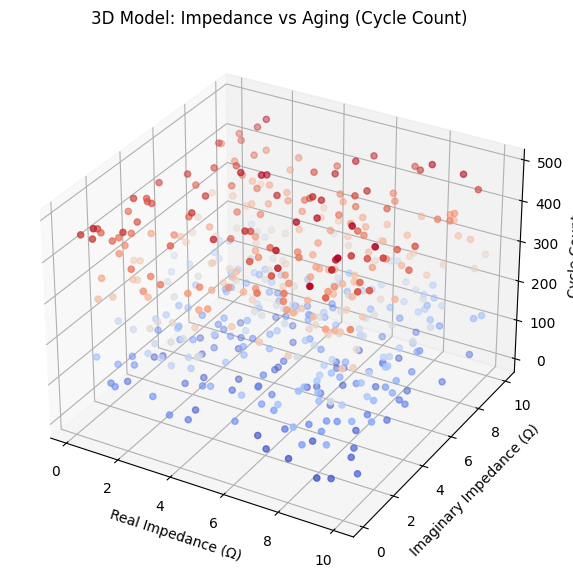

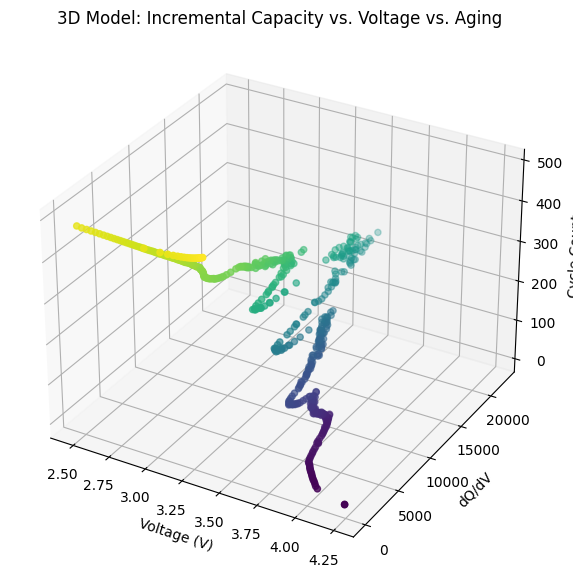

 Model Performance on Test Data:
 Mean Absolute Error (MAE): 37.2584 Ah
 R² Score: 0.9783
 Test predictions saved in 'test_predictions.csv'.


In [16]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.integrate import cumtrapz
from mpl_toolkits.mplot3d import Axes3D
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, r2_score

# Load the dataset
df = pd.read_csv("00001.csv")  

# Calculate Battery Capacity using Trapezoidal Rule #
df["Capacity"] = cumtrapz(df["Current_measured"], df["Time"], initial=0)

#3D Model for Impedance vs Aging (Cycle Count) #
fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection="3d")

# Simulated Impedance Data 
df["Re_Z"] = np.random.uniform(0.1, 10, len(df))  # Real Impedance (Ω)
df["Im_Z"] = np.random.uniform(0.1, 10, len(df))  # Imaginary Impedance (Ω)
df["Cycle"] = np.linspace(1, len(df), len(df))  # Simulated Cycle Count

ax.scatter(df["Re_Z"], df["Im_Z"], df["Cycle"], c=df["Cycle"], cmap="coolwarm")
ax.set_xlabel("Real Impedance (Ω)")
ax.set_ylabel("Imaginary Impedance (Ω)")
ax.set_zlabel("Cycle Count")
ax.set_title("3D Model: Impedance vs Aging (Cycle Count)")
plt.show()

#3D Model for Incremental Capacity (dQ/dV vs. Voltage vs. Cycle Count) #
df["dQ/dV"] = np.gradient(df["Capacity"], df["Voltage_measured"])

fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection="3d")

ax.scatter(df["Voltage_measured"], df["dQ/dV"], df["Cycle"], c=df["Cycle"], cmap="viridis")
ax.set_xlabel("Voltage (V)")
ax.set_ylabel("dQ/dV")
ax.set_zlabel("Cycle Count")
ax.set_title("3D Model: Incremental Capacity vs. Voltage vs. Aging")
plt.show()

# Train ML Model to Predict Battery Capacity #
features = ["Voltage_measured", "Current_measured", "Temperature_measured", "Current_load", "Voltage_load"]
X = df[features]
y = df["Capacity"]

# Train-test split (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale the data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Train Random Forest Model
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train_scaled, y_train)

# Predict on Test Data
y_pred_test = model.predict(X_test_scaled)

# Evaluate Accuracy on Test Data
mae_test = mean_absolute_error(y_test, y_pred_test)
r2_test = r2_score(y_test, y_pred_test)

print(f" Model Performance on Test Data:")
print(f" Mean Absolute Error (MAE): {mae_test:.4f} Ah")
print(f" R² Score: {r2_test:.4f}")

# Save Predictions for Analysis
df_test_results = X_test.copy()
df_test_results["Actual_Capacity"] = y_test
df_test_results["Predicted_Capacity"] = y_pred_test
df_test_results.to_csv("test_predictions.csv", index=False)
print(" Test predictions saved in 'test_predictions.csv'.")
